<a href="https://colab.research.google.com/github/anas1IA/Learning_non_supervised-/blob/main/Tp_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Partition clustering et Hierarchical clustering sont deux approches différentes pour regrouper des données en clusters.

##1)Partition Clustering :

**Dans la partition clustering**, on divise les données en un nombre fixe de clusters dès le départ.

**Les méthodes de partition clustering**les plus populaires incluent K-Means, K-Medoids et Gaussian Mixture Models (GMM).
Ces méthodes nécessitent généralement de spécifier le nombre de clusters à l'avance.

**Les algorithmes de partition clustering** ont généralement une complexité inférieure à celle des méthodes de clustering hiérarchique.
Hierarchical Clustering :

##2)Dans le clustering hiérarchique, les données sont regroupées en une structure d'arborescence (dendrogramme) où les clusters à un niveau supérieur contiennent des clusters à un niveau inférieur.
**Les méthodes de clustering hiérarchique** peuvent être divisées en deux types : agglomératif (ascendant) et divisif (descendant). L'algorithme CHA mentionné précédemment est un exemple d'agglomératif.
**Les méthodes de clustering hiérarchique** ne nécessitent pas de spécifier le nombre de clusters à l'avance. Au lieu de cela, elles fournissent une vue globale de la structure des données.
Ces méthodes sont souvent utilisées lorsqu'il est intéressant d'observer les relations de similarité entre les données à différents niveaux d'agrégation.
Les algorithmes de clustering hiérarchique sont souvent plus coûteux en termes de calcul que les méthodes de partitionnement, en particulier pour de grandes quantités de données.

le lien pour comprendre cluster :

 explainghttps://www.youtube.com/watch?v=ex77cTkRArs

https://www.youtube.com/watch?v=vg1w5ZUF5lA

code implementation :https://www.youtube.com/watch?v=l4vTwXL_5Cc


###L'algorithme CHA (Clustering by Hierarchical Agglomerative Clustering) est un algorithme de regroupement hiérarchique agglomératif largement utilisé. Voici comment implémenter CHA avec les méthodes de regroupement demandées :

**Single linkage** : Dans cette méthode, la distance minimale entre les éléments des deux clusters est utilisée comme critère de regroupement.

**Complete linkage** : Cette méthode utilise la distance maximale entre les éléments des deux clusters comme critère de regroupement.

**Group average** : Ici, la moyenne des distances entre chaque paire d'éléments des deux clusters est utilisée comme critère de regroupement.

**Ward**: La méthode de Ward minimise la variance lors de la fusion des clusters.

**Centroid**: Cette méthode utilise la distance entre les centroids (moyennes) des clusters comme critère de regroupement

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.vq import whiten
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
file_path = "marketing_campaign.csv"

Dataset traitment :https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook

Team lien : https://teams.microsoft.com/_#/pdf/viewer/teams/https:~2F~2Fum5sma.sharepoint.com~2Fsites~2FUnsupervisedLearningSNA~2FShared%20Documents~2FGeneral~2FTP5_CHA.pdf?threadId=19:DhO_qynDw-Pjk1fbwl7NZ4ZUwfX3IrobXDLMLBunq3A1@thread.tacv2&messageId=1709893343527&baseUrl=https:~2F~2Fum5sma.sharepoint.com~2Fsites~2FUnsupervisedLearningSNA&fileId=b31a91cd-beee-490d-a45c-2c36147e2589&ctx=chiclet&viewerAction=view

In [7]:
data = pd.read_csv(file_path, sep='\t')

In [8]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [11]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-11-627b1cd2d108>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
<ipython-input-11-627b1cd2d108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [12]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

<ipython-input-12-773b3d3748ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = days
<ipython-input-12-773b3d3748ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


In [13]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [14]:
data["Age"] = 2024-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-14-e4aedff3eae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2024-data["Year_Birth"]
<ipython-input-14-e4aedff3eae1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
<ipython-input-14-e4aedff3eae1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [15]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

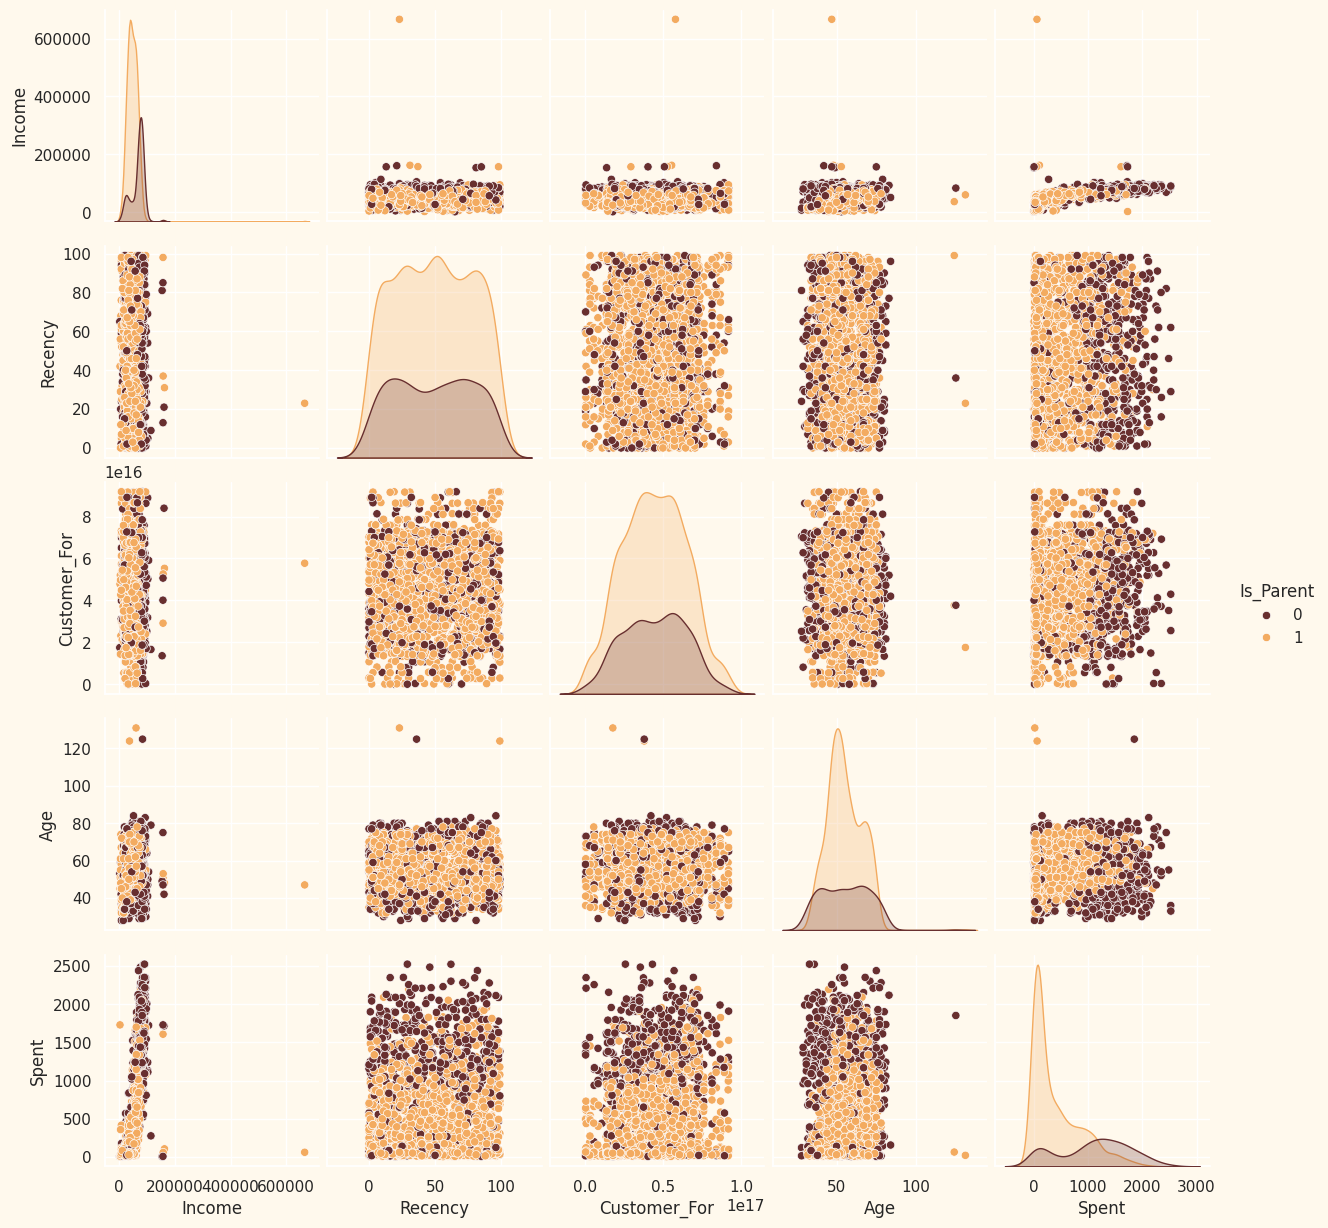

In [16]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

In [17]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<ipython-input-18-d34280bbb426>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


<Axes: >

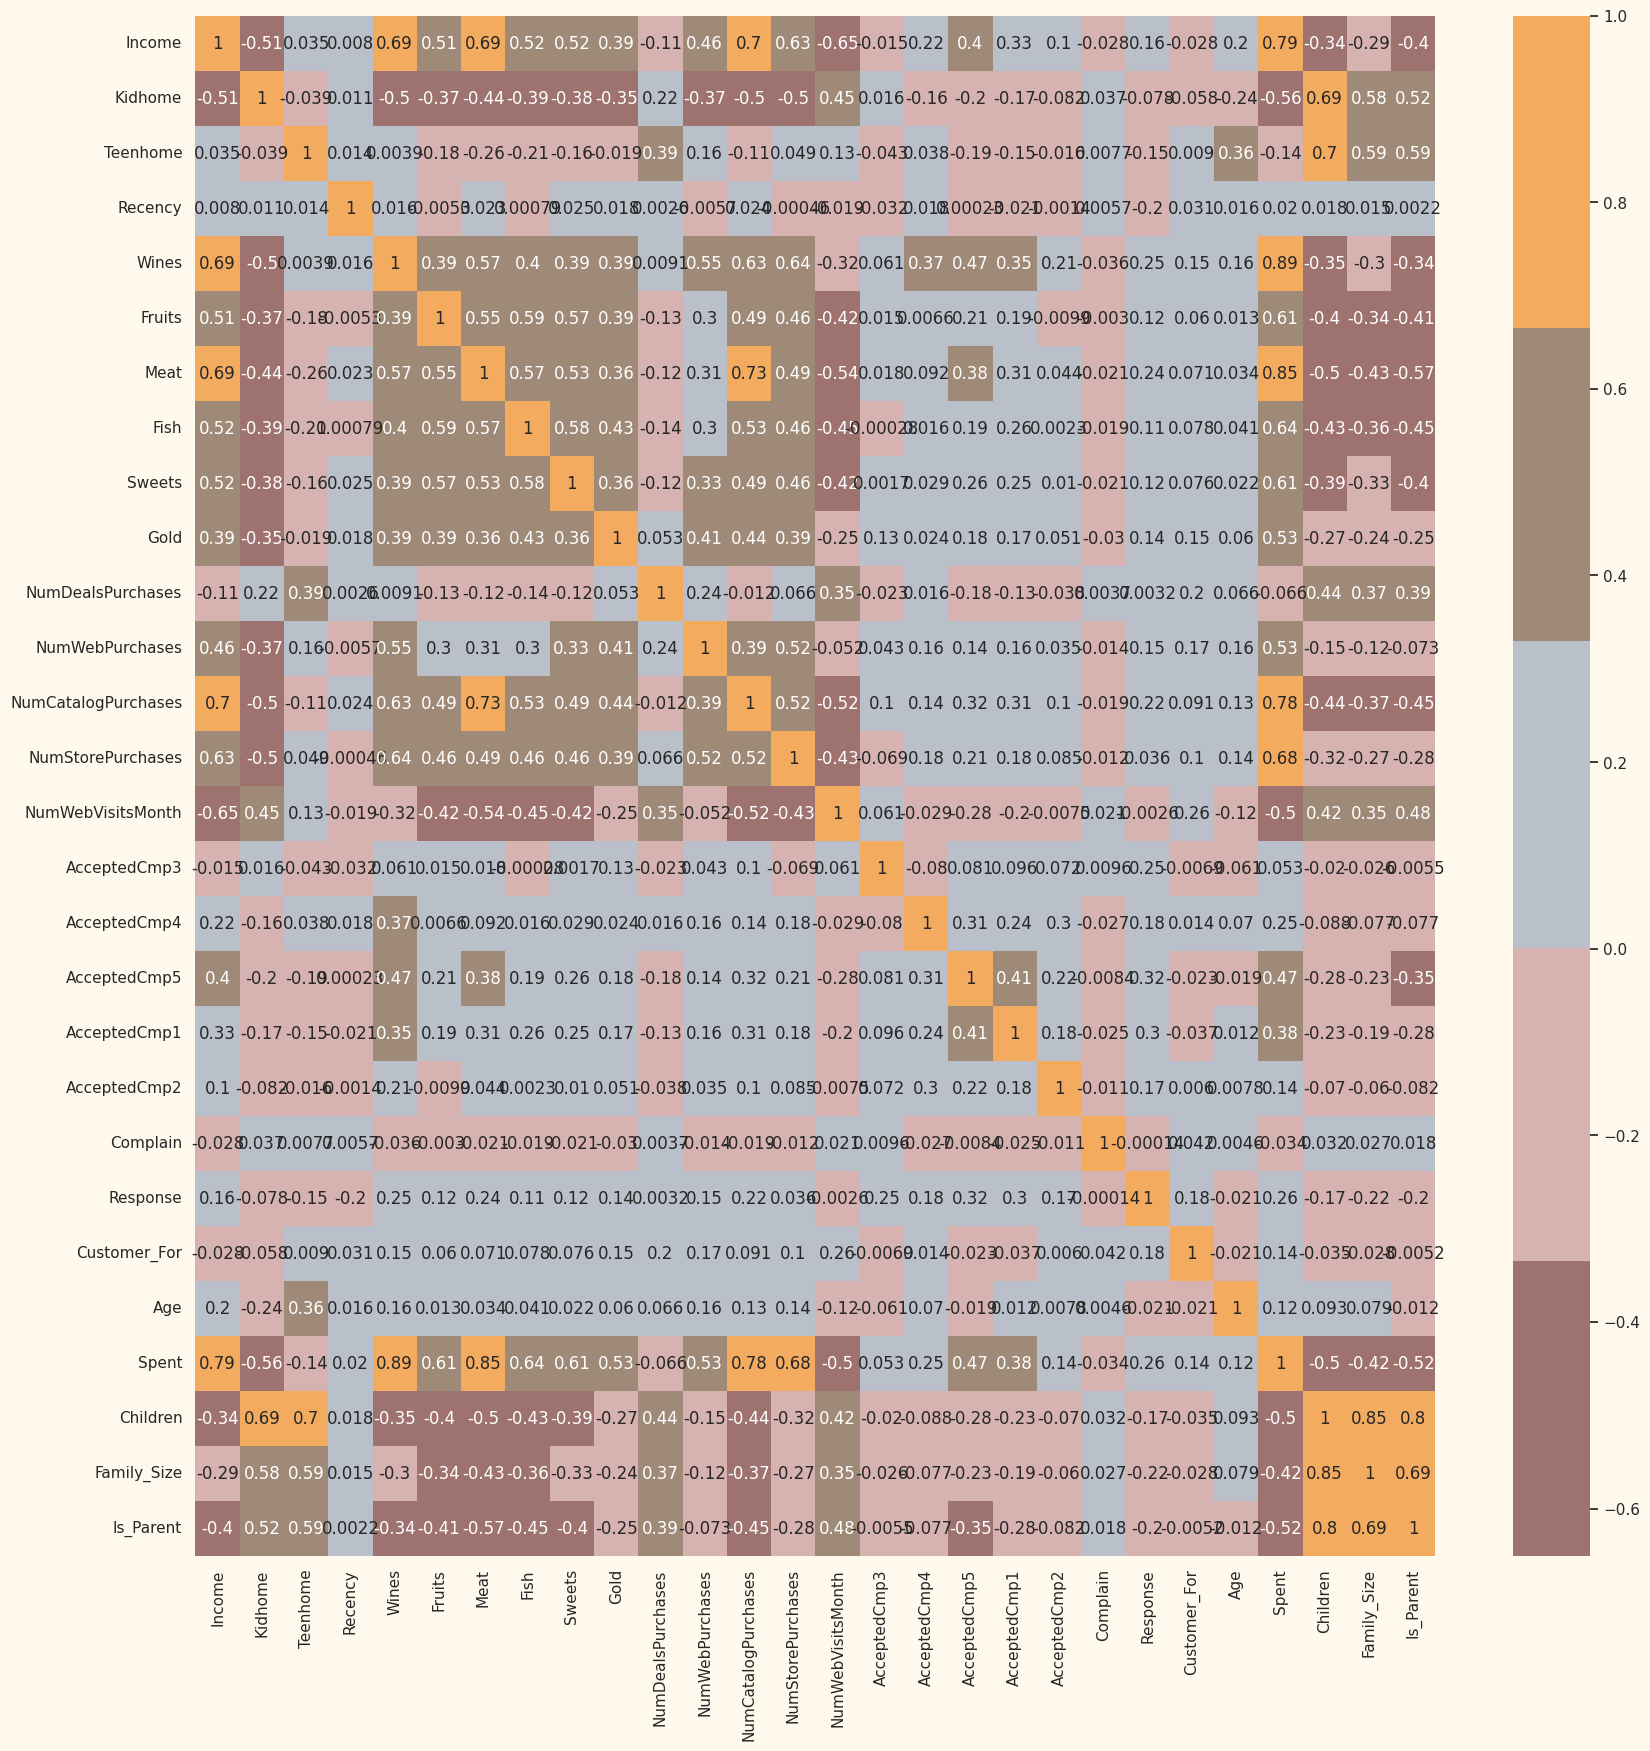

In [18]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [20]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,57,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,78,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,43,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,68,843,Partner,1,3,1


In [21]:
# Get data types of each column
data_types = data.dtypes

# Identify categorical features
categorical_features = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical features
print("Categorical Features:")
print(categorical_features)

Categorical Features:
['Education', 'Living_With']


In [22]:
data2 = data.copy()

In [23]:
# One-Hot Encoding
one_hot_encoded = pd.get_dummies(data2)

# Label Encoding
label_encoded = data2.apply(lambda x: x.astype('category').cat.codes)

In [24]:
data2

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,57,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,78,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,43,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,68,843,Partner,1,3,1


In [25]:
data2["Education"].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

In [26]:
data2["Living_With"].value_counts()


Partner    1428
Alone       784
Name: Living_With, dtype: int64

In [27]:
label_encoded

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,1169,0,0,58,517,86,410,134,87,...,0,0,1,646,39,901,0,0,0,0
1,0,831,1,1,38,11,1,6,2,1,...,0,0,0,27,42,21,0,2,2,1
2,0,1565,0,0,26,371,49,126,92,21,...,0,0,0,294,31,499,1,0,1,0
3,0,241,1,0,26,11,4,20,9,3,...,0,0,0,16,12,47,1,1,2,1
4,1,1172,1,0,94,161,43,117,42,27,...,0,0,0,157,15,318,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1251,0,1,46,551,43,177,38,114,...,0,0,0,359,29,794,1,1,2,1
2236,1,1337,2,1,56,356,0,30,0,0,...,0,0,0,12,50,333,1,3,4,1
2237,0,1132,0,0,91,652,48,205,28,12,...,0,0,0,152,15,754,0,0,0,0
2238,1,1489,0,1,8,372,30,202,70,30,...,0,0,0,153,40,533,1,1,2,1


In [28]:
label_encoded["Living_With"].value_counts()

1    1428
0     784
Name: Living_With, dtype: int64

In [29]:
label_encoded ["Education"].value_counts()

0    1115
1     845
2     252
Name: Education, dtype: int64

In [30]:
# Whiten the numeric data
whiten_numeric = pd.DataFrame(whiten(label_encoded), columns=label_encoded.columns, index=label_encoded.index)

whiten_numeric

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.000000,2.047114,0.000000,0.000000,2.004383,2.201254,2.407608,2.727225,3.148708,2.253223,...,0.0,0.0,2.796402,3.384441,3.334246,2.798339,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.455219,1.862775,1.837796,1.313217,0.046835,0.027995,0.039911,0.046996,0.025899,...,0.0,0.0,0.000000,0.141455,3.590727,0.065222,0.000000,2.669170,2.207429,2.213594
2,0.000000,2.740576,0.000000,0.000000,0.898517,1.579623,1.371777,0.838123,2.161799,0.543881,...,0.0,0.0,0.000000,1.540287,2.650298,1.549802,2.090562,0.000000,1.103714,0.000000
3,0.000000,0.422031,1.862775,0.000000,0.898517,0.046835,0.111982,0.133035,0.211480,0.077697,...,0.0,0.0,0.000000,0.083825,1.025922,0.145973,2.090562,1.334585,2.207429,2.213594
4,1.465243,2.052367,1.862775,0.000000,3.248484,0.685497,1.203804,0.778257,0.986908,0.699276,...,0.0,0.0,0.000000,0.822534,1.282402,0.987649,2.090562,1.334585,2.207429,2.213594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.000000,2.190709,0.000000,1.837796,1.589683,2.346017,1.203804,1.177363,0.892917,2.952499,...,0.0,0.0,0.000000,1.880827,2.479311,2.466017,2.090562,1.334585,2.207429,2.213594
2236,1.465243,2.341310,3.725549,1.837796,1.935267,1.515757,0.000000,0.199553,0.000000,0.000000,...,0.0,0.0,0.000000,0.062869,4.274675,1.034236,2.090562,4.003756,4.414857,2.213594
2237,0.000000,1.982321,0.000000,0.000000,3.144809,2.776049,1.343781,1.363612,0.657939,0.310789,...,0.0,0.0,0.000000,0.796339,1.282402,2.341785,0.000000,0.000000,0.000000,0.000000
2238,1.465243,2.607487,0.000000,1.837796,0.276467,1.583881,0.839863,1.343657,1.644847,0.776973,...,0.0,0.0,0.000000,0.801578,3.419740,1.655399,2.090562,1.334585,2.207429,2.213594


In [31]:
for j  in whiten_numeric.columns :
  print([j, whiten_numeric[j].std()])

['Education', 1.0002261164528616]
['Income', 1.0002261164528616]
['Kidhome', 1.0002261164528616]
['Teenhome', 1.0002261164528619]
['Recency', 1.0002261164528616]
['Wines', 1.0002261164528616]
['Fruits', 1.0002261164528616]
['Meat', 1.0002261164528616]
['Fish', 1.0002261164528616]
['Sweets', 1.0002261164528616]
['Gold', 1.0002261164528619]
['NumDealsPurchases', 1.0002261164528616]
['NumWebPurchases', 1.0002261164528616]
['NumCatalogPurchases', 1.0002261164528616]
['NumStorePurchases', 1.0002261164528616]
['NumWebVisitsMonth', 1.0002261164528616]
['AcceptedCmp3', 1.0002261164528616]
['AcceptedCmp4', 1.0002261164528616]
['AcceptedCmp5', 1.0002261164528616]
['AcceptedCmp1', 1.0002261164528616]
['AcceptedCmp2', 1.0002261164528619]
['Complain', 1.0002261164528616]
['Response', 1.0002261164528616]
['Customer_For', 1.0002261164528616]
['Age', 1.0002261164528616]
['Spent', 1.0002261164528616]
['Living_With', 1.0002261164528616]
['Children', 1.0002261164528616]
['Family_Size', 1.0002261164528616

In [32]:
# List of all distance metrics
dict_pdist  = {}
distance_metrics = ['euclidean', 'minkowski', 'cityblock', 'chebyshev', 'hamming',
                    'canberra', 'braycurtis', 'mahalanobis', 'cosine', 'correlation',
                    'jaccard', 'dice', 'rogerstanimoto', 'russellrao',
                    'sokalmichener', 'sokalsneath', 'yule']
for j in distance_metrics :
  dict_pdist[j] = pdist(whiten_numeric, metric = j)

In [33]:
 dict_pdist

{'euclidean': array([10.21084595,  6.69185061, 10.28642884, ...,  7.66060525,
         9.6979593 ,  6.26253041]),
 'minkowski': array([10.21084595,  6.69185061, 10.28642884, ...,  7.66060525,
         9.6979593 ,  6.26253041]),
 'cityblock': array([43.21492525, 25.80031963, 44.1798618 , ..., 30.18148438,
        41.37081808, 25.3544272 ]),
 'chebyshev': array([3.2429857 , 2.88092398, 3.60115498, ..., 3.81678962, 3.81678962,
        2.79640208]),
 'hamming': array([0.73333333, 0.6       , 0.7       , ..., 0.76666667, 0.83333333,
        0.66666667]),
 'canberra': array([16.30986646,  8.28378539, 16.77313351, ..., 11.95524887,
        16.94985136, 10.93761345]),
 'braycurtis': array([0.65962579, 0.35684115, 0.71404371, ..., 0.45685407, 0.62381792,
        0.34295272]),
 'mahalanobis': array([6.75127733, 7.73538655, 7.42223766, ..., 8.73270961, 9.25069891,
        5.45799894]),
 'cosine': array([0.59412287, 0.20828095, 0.64427414, ..., 0.39996312, 0.59037069,
        0.2428878 ]),
 'corre

In [34]:
from scipy.spatial.distance import squareform
df =squareform(dict_pdist['euclidean'])

In [35]:
df

array([[ 0.        , 10.21084595,  6.69185061, ...,  8.38235733,
         7.77333805,  9.33702714],
       [10.21084595,  0.        ,  7.41913838, ...,  8.77406195,
         6.22355354,  5.12934814],
       [ 6.69185061,  7.41913838,  0.        , ...,  6.31036088,
         4.26464315,  7.5627967 ],
       ...,
       [ 8.38235733,  8.77406195,  6.31036088, ...,  0.        ,
         7.66060525,  9.6979593 ],
       [ 7.77333805,  6.22355354,  4.26464315, ...,  7.66060525,
         0.        ,  6.26253041],
       [ 9.33702714,  5.12934814,  7.5627967 , ...,  9.6979593 ,
         6.26253041,  0.        ]])

In [39]:
dict_linkage  = {}
# # linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
# # for j  in  distance_metrics :
# #   for k  in linkage_methods :
#     dict_linkage[j+'_'+k] = linkage(dict_pdist[j],method = k,metric = j,optimal_ordering = False)

In [44]:
dict_linkage['eucldien_complite'] = linkage(dict_pdist['euclidean'] ,method ='complete', optimal_ordering = True)

In [45]:
dict_linkage['eucldien_complite']

array([[6.70000000e+02, 8.68000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.05000000e+02, 8.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.41000000e+03, 1.03800000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.41800000e+03, 4.41400000e+03, 1.61735736e+01, 4.85000000e+02],
       [4.41900000e+03, 4.41500000e+03, 1.81372125e+01, 1.72700000e+03],
       [4.42000000e+03, 4.42100000e+03, 1.95065663e+01, 2.21200000e+03]])

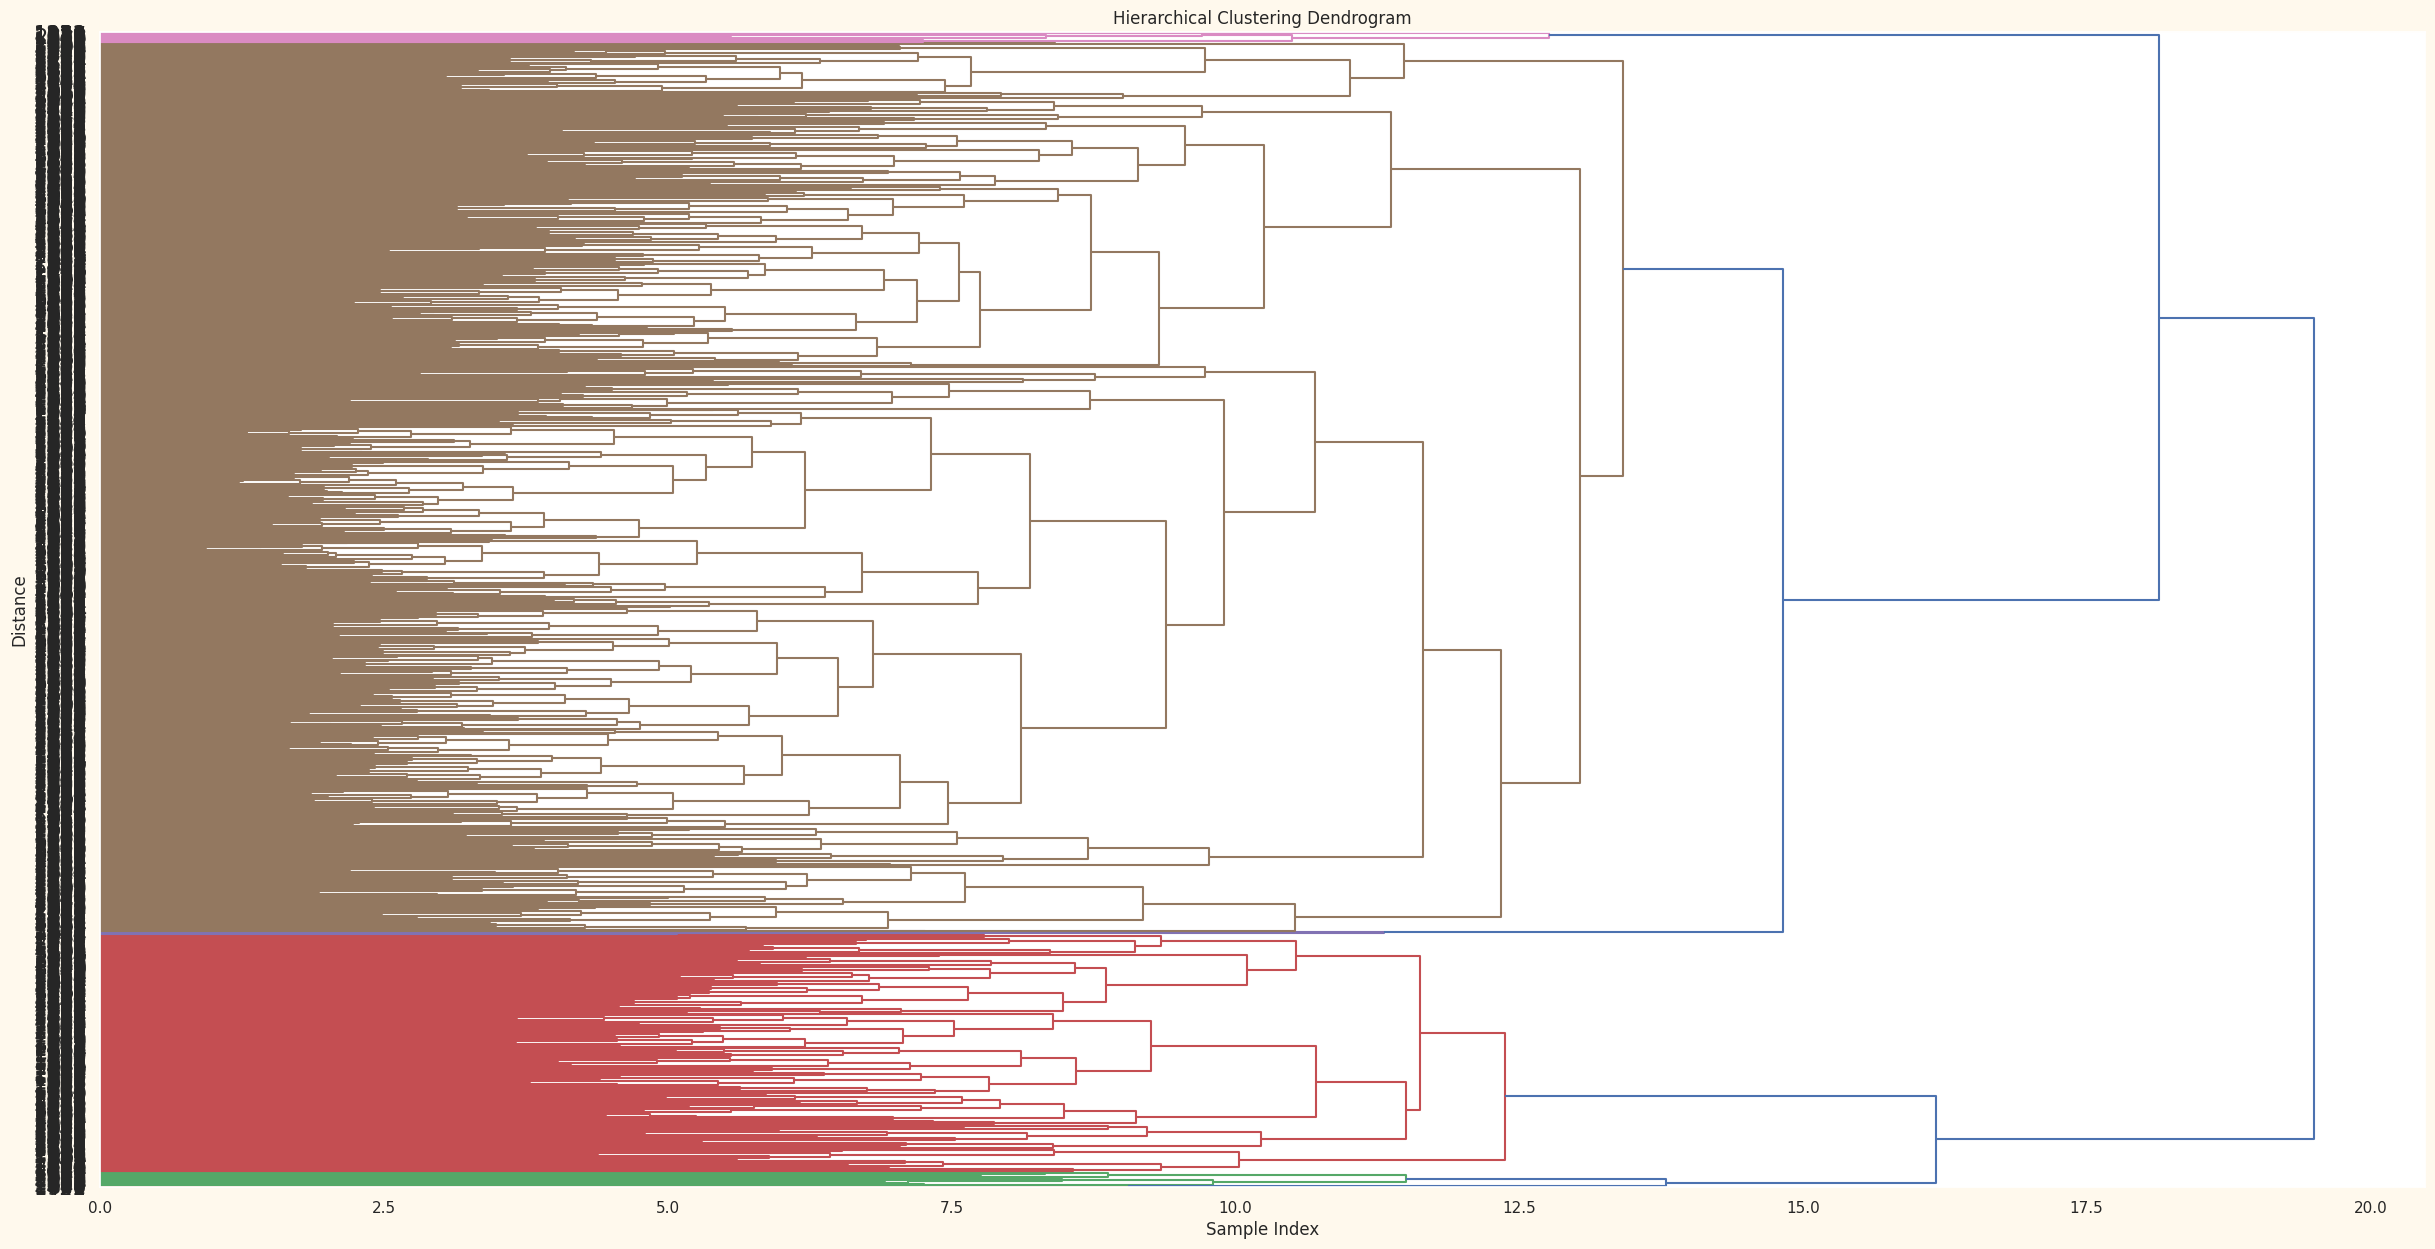

In [49]:

plt.figure(figsize=(30,15))
dendrogram(dict_linkage['eucldien_complite'],labels=whiten_numeric.index,orientation='right',leaf_font_size=15)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()